## Step 1: Import the required library

Skimage package enables us to do image processing using Python. The language is extremely simple to understand but does some of the most complicated tasks. Here are a few library you need to import to get started,

In [4]:
from matplotlib import pyplot as plt
from skimage import data 
from skimage.feature import blob_dog,blob_log,blob_doh
from math import sqrt
from skimage.color import rgb2gray
import glob
from skimage.io import imread

## Step 2 : Import the image

Once we have all the libraries in place, we need to import our image file to python. Following is the code you can use to import the image file. Note that the image is imported in grey scale, which basically means that each pixel is a shade of grey. And each pixel essentially becomes one cell in a matrix. In this case the image is matrix of 480*581 cells (or image of 480*581 pixels).

In [5]:
example_file = glob.glob(r"/home/alam/Desktop/wint_sky.gif")[0]

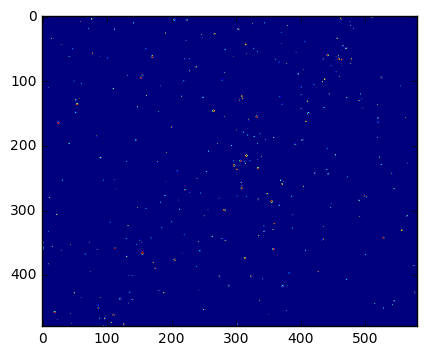

In [8]:
im = imread(example_file,as_grey = True)
plt.imshow(im)
plt.show()

## Step 3 : Find the number of Stars

Now comes the critical part where our major labor is done by a few commands. These few command go out for searching continuous objects in the picture. Blobs_log gives three outputs for each object found. First two are the coordinates and the third one is the area of the object. The radius of each blob/object can be estimated using this column (area of the object).

In [9]:
blobs_log = blob_log(im,max_sigma = 30,num_sigma = 10,threshold = .1)
## compute  redii in the 3rd column.
blobs_log[:,2] = blobs_log[:,2] * sqrt(2)
numrows = len(blobs_log)
print("Number of stars counted : ",numrows)


('Number of stars counted : ', 308)


As we can see that the algorithm has estimated 308 visible stars. Let’s now look at how accurate are these readings.

## Step 4 : Validated whether we captured all the stars

The number 308 is still coming out of a black box. Let’s look at whether we have spotted all the stars correctly. For this I am circling each estimated star position. And the look at the image if we are missing any star.

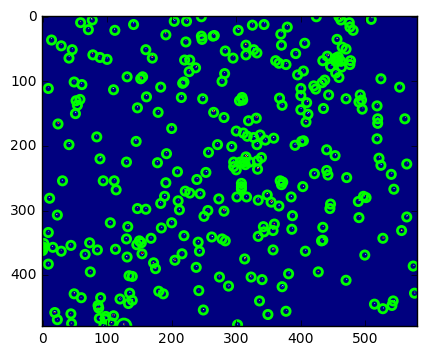

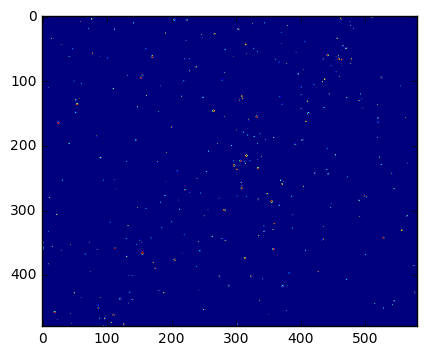

In [14]:
fig, ax = plt.subplots(1,1)
plt.imshow(im)
plt.show()
for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x,y),r + 5,color='lime', linewidth = 2,fill = False)
    ax.add_patch(c)